In [1]:
import xgboost as xgb
import pandas as pd
import shap
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [48]:
model = xgb.Booster()

model.load_model("models/No coords/xgb_no_coords.model")

In [3]:
d_train = xgb.DMatrix(X_sample)


In [5]:
X_sample = pd.read_csv("models/No coords/shap_X_sample_no_coords.csv",index_col=0)

In [49]:
d_train = xgb.DMatrix(X_sample)

In [50]:
y_pred = model.predict(d_train)

In [6]:
X_sample.columns

Index(['distance_haversine', 'trip_direction', 'Fare', 'Additional Charges',
       'work_day', 'month', 'hour', 'day', 'hour_temp', 'hour_wind', 'rain',
       'metro_x', 'metro_y', 'pick_dist_dt', 'drop_dist_dt', 'ln_pop_den_x',
       'ln_pop_den_y', 'pct_bach_x', 'median_income_x', 'sex_ratio_x',
       'pct_non_white_x', 'pct_age_18_29_x', 'pct_no_car_x', 'pct_bach_y',
       'median_income_y', 'sex_ratio_y', 'pct_non_white_y', 'median_age_y',
       'pct_no_car_y', 'residential_den_x', 'empoloyment_den_x',
       'job_entropy_x', 'dist_to_tran_x', 'walkability_x', 'residential_den_y',
       'empoloyment_den_y', 'job_entropy_y', 'dist_to_tran_y',
       'walkability_y'],
      dtype='object')

In [7]:

X_sample.columns = ['Distance', 'trip direction', 'Trip base fare', 'Additional Charges',
       'Workday', 'month', 'Hour', 'day', 'hour_temp', 'hour_wind', 'rain',
       'metro_x', 'metro_y', 'pick_dist_dt', 'drop_dist_dt', 'ln_pop_den_x',
       'ln_pop_den_y', 'Pct_bach', 'Median_income', 'sex_ratio_x',
       'Pct_non_white', 'Pct_age_18_29', 'Pct_no_car', 'pct_bach_y',
       'median_income_y', 'sex_ratio_y', 'pct_non_white_y', 'median_age_y',
       'pct_no_car_y', 'residential_den_x', 'empoloyment_den_x',
       'job_entropy_x', 'dist_to_tran_x', 'walkability_x', 'residential_den_y',
       'empoloyment_den_y', 'job_entropy_y', 'dist_to_tran_y',
       'walkability_y']


In [8]:
X_sample.shape

(300000, 39)

In [9]:
shap_values = np.loadtxt("models/No coords/shap_values_3_no_coords.csv",delimiter=',')

In [30]:
def odds(arr):
    odds = np.exp(arr)
    return odds/(1+odds) - 0.5

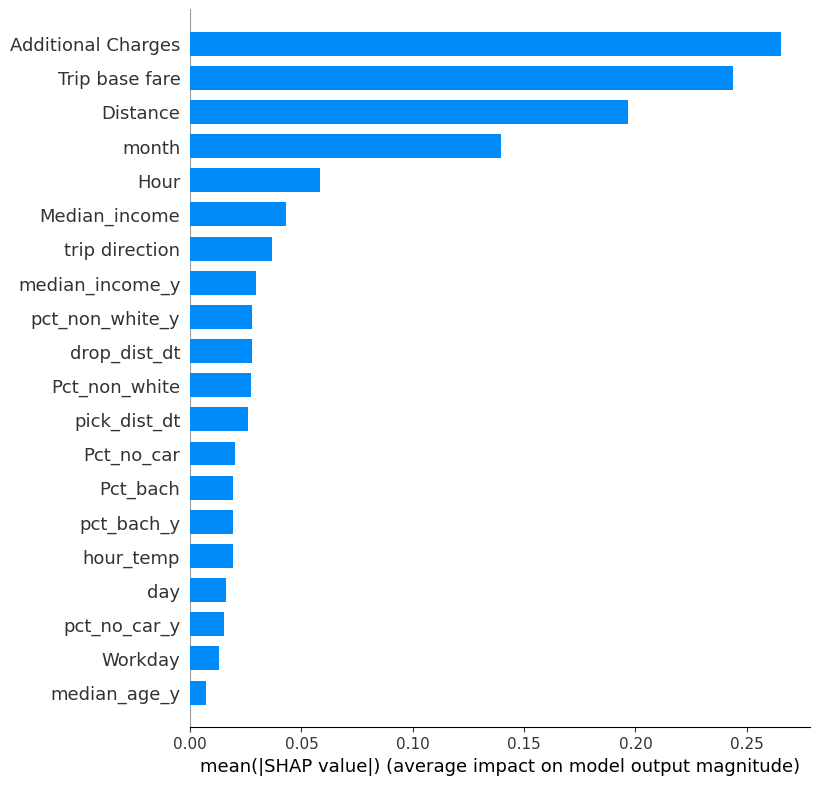

In [11]:
fig, ax=plt.subplots(dpi=100)
shap.summary_plot(odds(shap_values)-0.5, X_sample, plot_type="bar")



In [12]:
#X_sample.loc[X_sample.shared==1,]

In [81]:
trans_shap = np.zeros(shap_values.shape)

for j in range(shap_values.shape[1]):
    trans_shap[:,j] = y_pred - odds(np.sum(np.delete(shap_values, j,1) ,axis=1))-0.5
    

In [97]:
from scipy.stats import gaussian_kde

def plot(j, xlim=None,inter=None):
    
    fig, ax=plt.subplots(dpi=150,figsize=(6,4))
    x = X_sample.iloc[:,j].values.reshape(-1).astype(int)
    y = odds(shap_values[:,j]).reshape(-1)

    #xy = np.vstack([x,y])
    #z = gaussian_kde(xy)(xy)
    #print(np.min(z),np.max(z))
    
    
    import statsmodels.api as sm
    lowess = sm.nonparametric.lowess(y, x, frac=.5)

    #ax.plot(*list(zip(*lowess)), color="red", )
    

    ax.axhline(0, linestyle='--',color='black')
    
    shap.dependence_plot(j, odds(shap_values), X_sample, ax=ax,interaction_index=inter)
    
    #ax.set_xlim(xlim)

    ax.set_xlabel(X_sample.columns[j],fontsize=10)
    ax.set_ylabel("Probability to share \n(SHAP value)",fontsize=10)


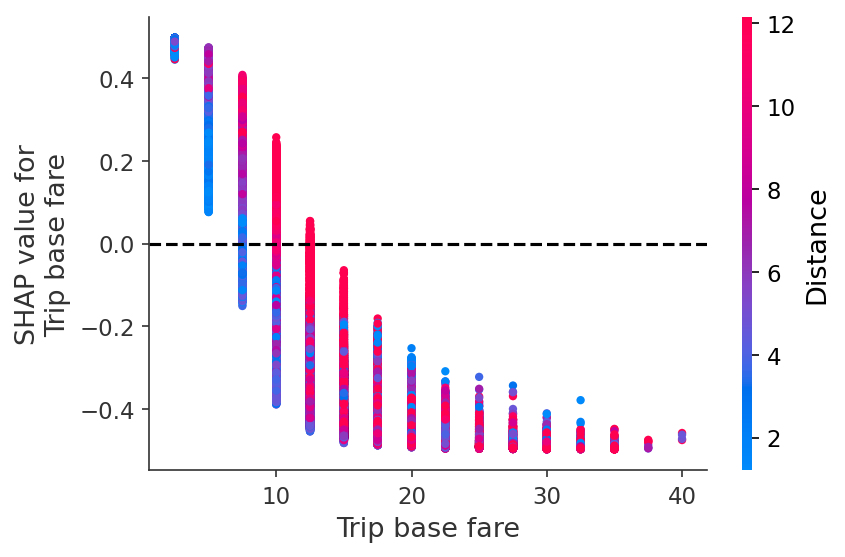

In [98]:
plot(2, inter=0)

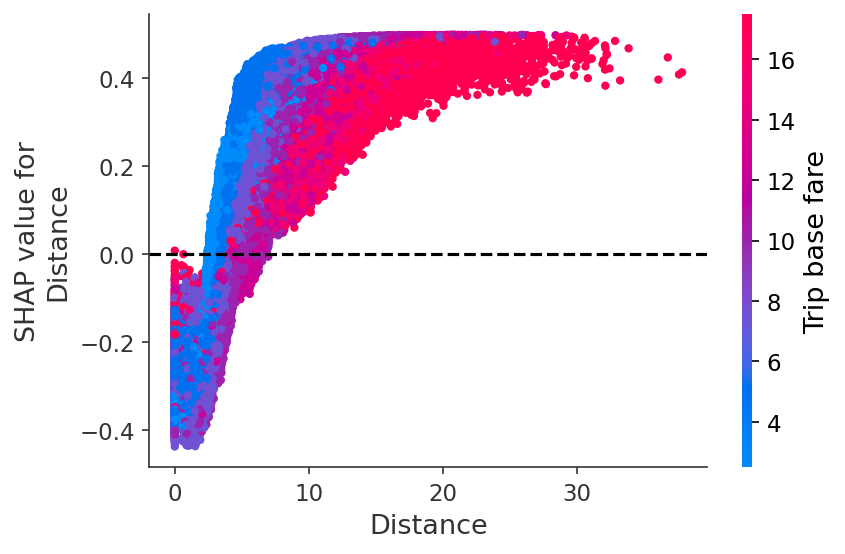

In [99]:
plot(0, inter=2)

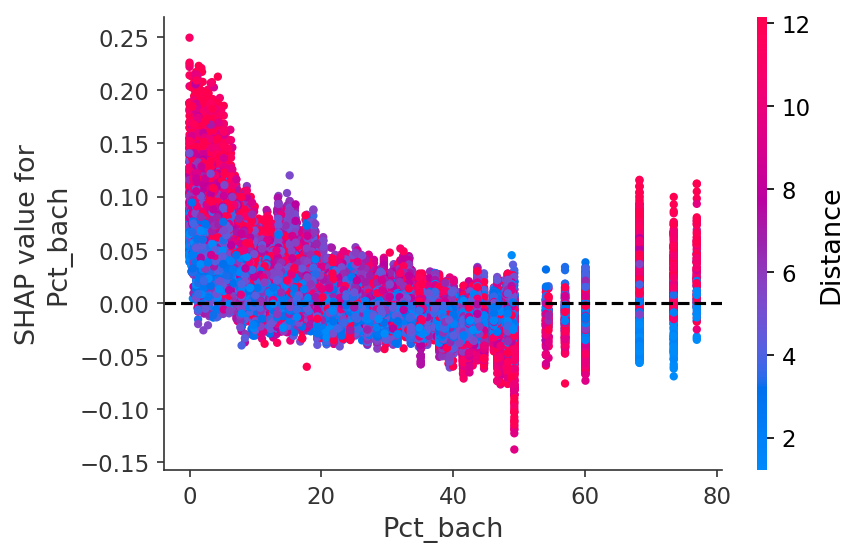

In [101]:
plot(17, inter=0)

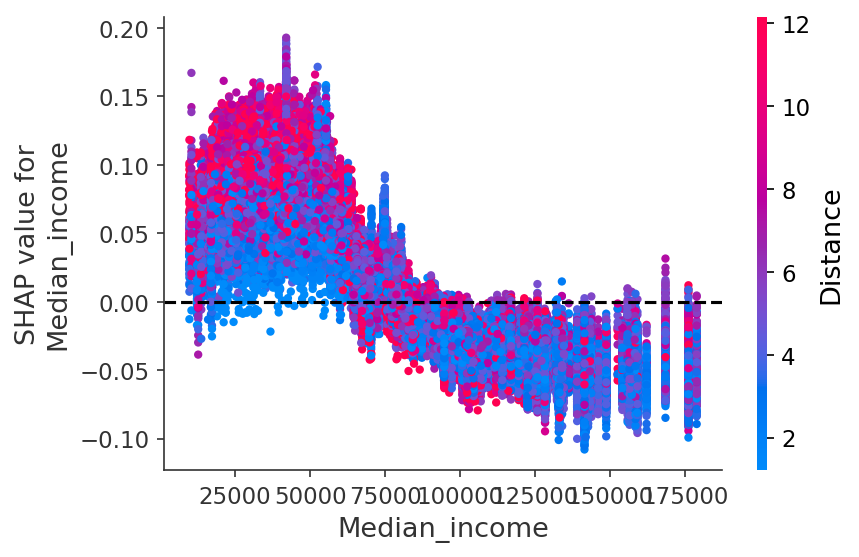

In [102]:
plot(18, inter=0)

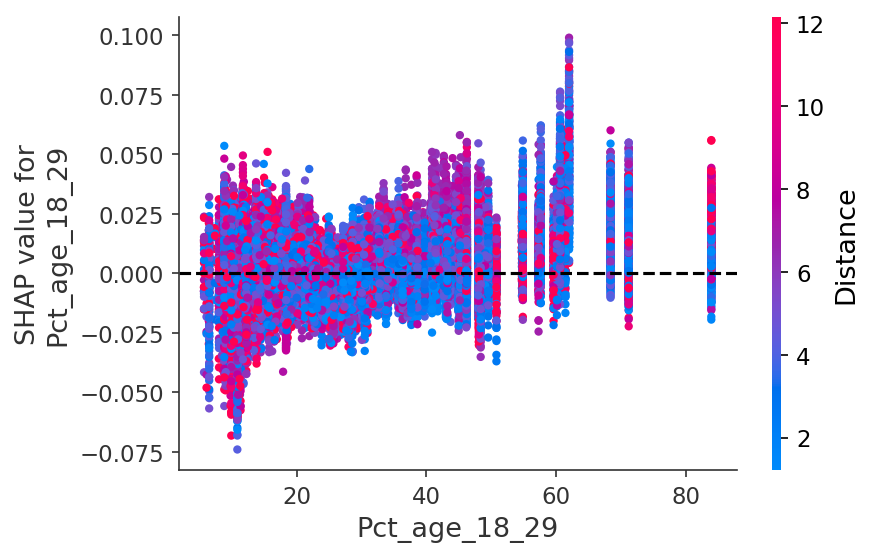

In [103]:
plot(21, inter=0)

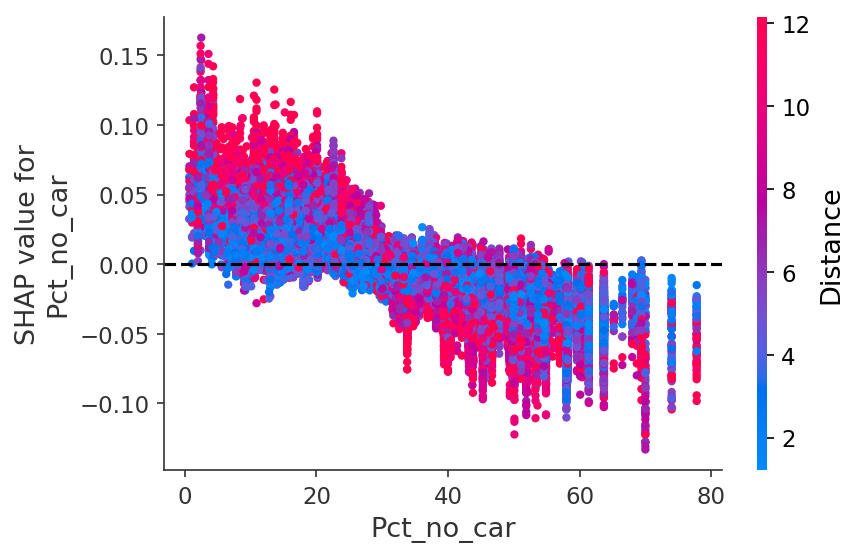

In [110]:
plot(22, inter=0)

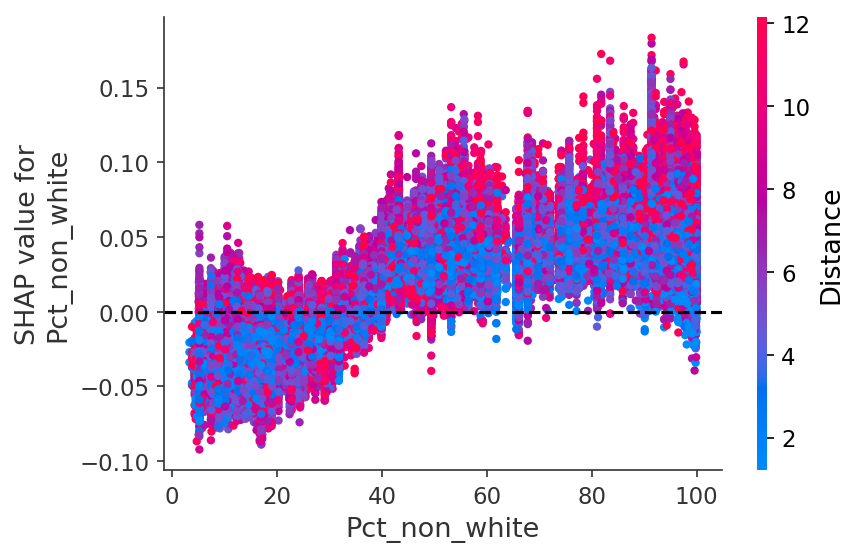

In [111]:
plot(20, inter=0)

invalid value encountered in true_divide


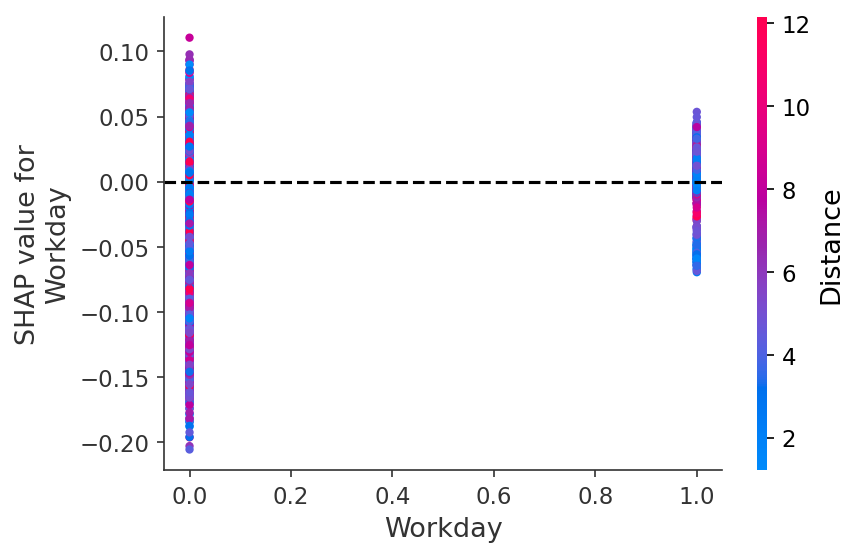

In [106]:
plot(4, inter=0)

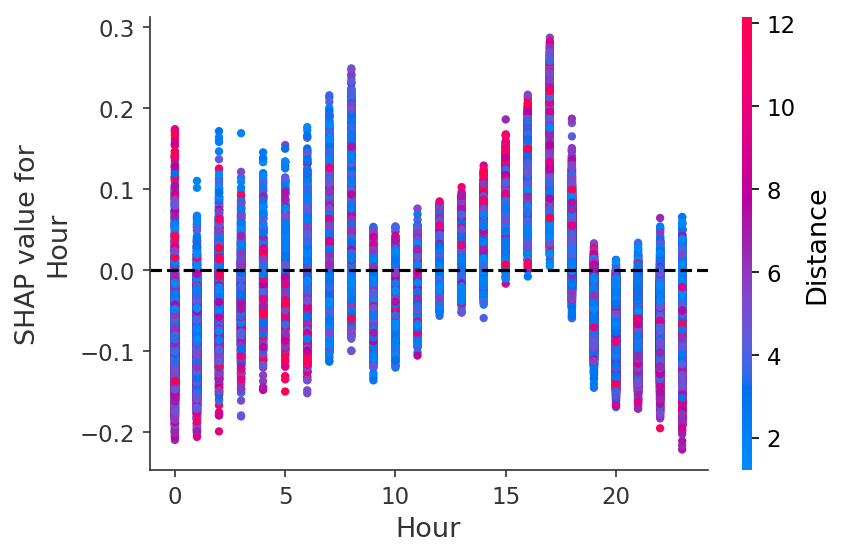

In [107]:
plot(6, inter=0)

In [47]:
odds(shap_values[:,0]).max()

0.4976803581801461

(array([ 3461., 48947., 46103., 39326., 41135., 33490., 25697., 22250.,
        18435., 21156.]),
 array([-0.43682802, -0.34337718, -0.24992634, -0.1564755 , -0.06302467,
         0.03042617,  0.12387701,  0.21732785,  0.31077868,  0.40422952,
         0.49768036]),
 <BarContainer object of 10 artists>)

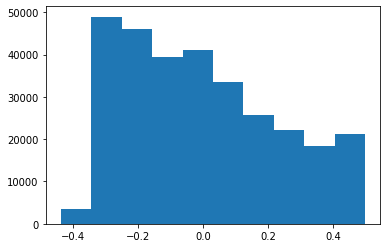

In [45]:
plt.hist())

(array([7.80000e+01, 1.83600e+03, 9.93200e+03, 2.53120e+04, 5.35700e+04,
        1.47735e+05, 5.06040e+04, 9.00900e+03, 1.71100e+03, 2.13000e+02]),
 array([-1.0836955 , -0.78271065, -0.48172579, -0.18074094,  0.12024392,
         0.42122877,  0.72221363,  1.02319848,  1.32418334,  1.6251682 ,
         1.92615305]),
 <BarContainer object of 10 artists>)

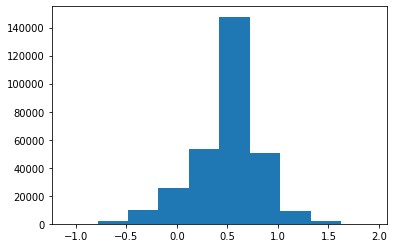

In [55]:
plt.hist(y_pred - np.sum(odds(shap_values),axis=1))

39

Text(0.5, -0.2, 'Probability to share vs. Trip direction')

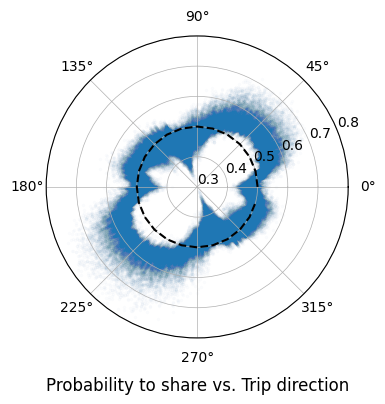

In [22]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, dpi=100)

x = np.radians(X_sample.iloc[:,1].values.reshape(-1))
y = odds(shap_values[:,1]).reshape(-1)

ax.set_ylim(0.3, 0.8)

ax.grid(linewidth=0.5)

#den_plot(ax,x,y)

ax.scatter(x, y, s=3, cmap='Blues', alpha=0.01)

equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)*0.5

ax.plot(np.deg2rad(equals), ones,linestyle='--',color='black')

ax.set_title("Probability to share vs. Trip direction",y=-0.2)